**Lakshay Soni**

*Student_ID* 8888349

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

*Download the MNIST data*

In [26]:
# Load the MNIST data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

# Access the data and target arrays
X = mnist.data
Y = mnist.target.astype(int)


https://github.com/CSCN8010/CSCN8010/blob/main/class_notebooks/classification-performance-metrics/performance_metrics_for_classification.ipynb
Some referance from above file as well

In [27]:
print("MNIST data shape:", X.shape)
print("MNIST target shape:", Y.shape)
print("Number of unique classes:", len(np.unique(Y)))

MNIST data shape: (70000, 784)
MNIST target shape: (70000,)
Number of unique classes: 10


In [28]:
list(mnist)

['data',
 'target',
 'frame',
 'categories',
 'feature_names',
 'target_names',
 'DESCR',
 'details',
 'url']

How many images does it have? 

->The total number of photos in the Minnesota Institute of Technology database is 70,000. Sixty thousand photos are the training set, while 10,000 images are the test set.

What is the size of each image? 

->Essentially, every picture is expressed as a 28 × 28 matrix of pixel counts(784), with each pixel element denoting an integer reflecting the pixel's magnitude, ranging from 0 to 255.

Based on the image with _Sample images from MNIST test dataset_, how many unique digits does this dataset include?

->Ten distinct numbers, ranging from 0 to 9, are included in the collection. Machine learning algorithms trained on the dataset aim to accurately categorize each image as one of the ten handwritten digits since each image in the collection represents a digit.

*Run an EDA (1.5 point). This time, the data we work with are images. It is a different type of data than everything we worked on before. What would be a suitable EDA? You can use Kaggle for inspiration.*

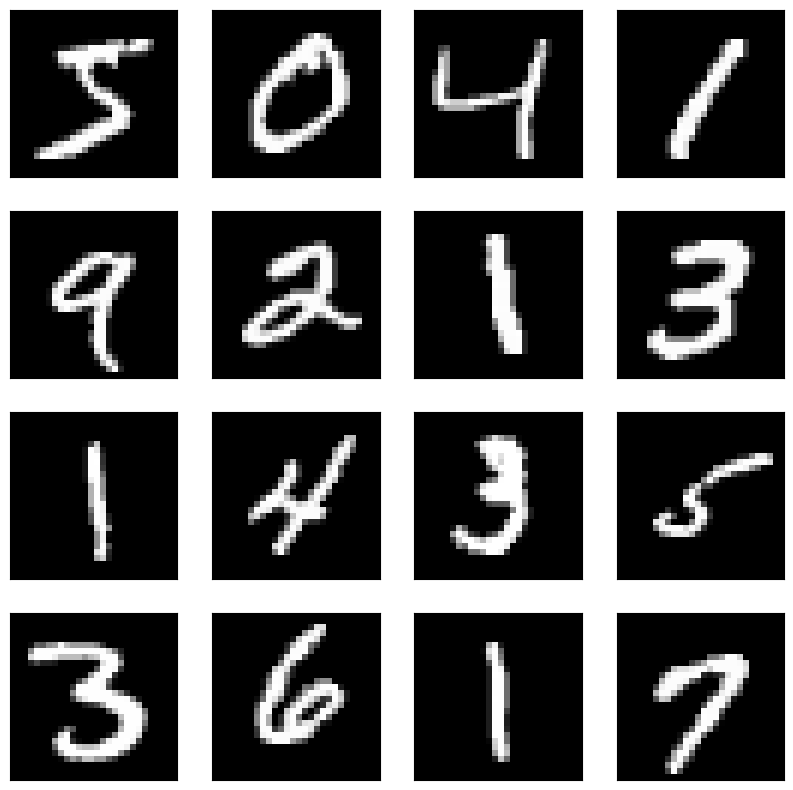

In [29]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(X.iloc[i].values.reshape(28, 28), cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

/var/folders/h2/r2gn4vhx2q93l_rzwtmgzs0r0000gn/T/ipykernel_13451/3588333905.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Y, palette='viridis')


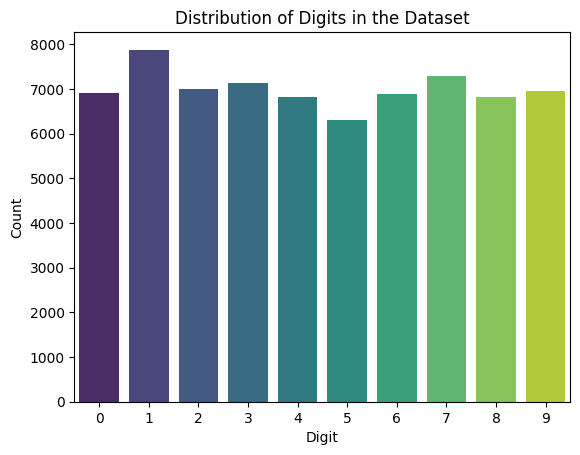

In [30]:
# Label distribution
sns.countplot(x=Y, palette='viridis')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Distribution of Digits in the Dataset')
plt.show()

Seaborn documentation on countplot: 
https://seaborn.pydata.org/generated/seaborn.countplot.html

*The original MNIST has 10 classes. Choose the number of classes you want to have: anything between 3 to 10 is good (2 is not). There is no right or wrong choice. Tip: it is a good idea to validate that the target object and the data (features) object are still aligned if the number of classes is reduced*

In [31]:
X_array = X.to_numpy()
# Specify the classes 
selected_classes = [1, 7, 8]

# Finding indences
selected_indices = np.where(np.isin(mnist.target.astype(int), selected_classes))[0]

# Create the modified dataset
X_modified = X_array[selected_indices]
Y_modified = Y[selected_indices]

print("Modified dataset shape:", X_modified.shape)
print("Modified target shape:", Y_modified.shape)
print("Selected classes:", selected_classes)
X, Y = X_modified, Y_modified

Modified dataset shape: (21995, 784)
Modified target shape: (21995,)
Selected classes: [1, 7, 8]


Basicaly we did this to specify for EDA which will be doing further because we are focusing on some special categories and probably be looking out to some imbalences if we have

*Split the dataset to train-validation-test.*

In [32]:
# Split the dataset into train and test sets
X_train_LS, X_test_LS, Y_train_LS, Y_test_LS = train_test_split(X, Y, test_size=0.2, random_state=42)

# Further split the train set into train and validation sets
X_train_LS, X_val_LS, Y_train_LS, Y_val_LS = train_test_split(X_train_LS, Y_train_LS, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Train set:", X_train_LS.shape, Y_train_LS.shape)
print("Validation set:", X_val_LS.shape, Y_val_LS.shape)
print("Test set:", X_test_LS.shape, Y_test_LS.shape)

Train set: (14076, 784) (14076,)
Validation set: (3520, 784) (3520,)
Test set: (4399, 784) (4399,)


The train set has 14,076 data points.
There are 784 characteristics in each sample, which correspond to the image pixel values.
This dataset is utilized for training the machine learning model.

The validation set includes 3,520 samples.
Each sample has 784 characteristics.
This set keeps track of the model's performance throughout training and helps avoid overfitting.

The test set consists of 4,399 samples.
Each sample has 784 characteristics.
After training, this set evaluates the model's generalizability on previously unseen data.

*Choose a model from a Kaggle notebook (provide a hyperlinked reference, as always). This model can be any model (e.g. SVM, sklearn-neural-network, logistic-regression...), and fit it.*

Classifying handwritten numbers is a multi-class classification issue applied to the MNIST dataset. One well-known and efficient algorithm for these kinds of jobs is logistic regression.

In [33]:
# Choose a model
from sklearn.linear_model import LogisticRegression

# Define and fit the model
model = LogisticRegression(random_state=42)
model.fit(X_train_LS, Y_train_LS)


/Users/lakshay/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

*Run an evaluation on the validation dataset (3 points): 
accuracy
confusion metric
precision, recall and F1 for each class*

In [34]:
# Make predictions on the validation set
Y_pred = model.predict(X_val_LS)

# Calculate evaluation metrics
accuracy = accuracy_score(Y_val_LS, Y_pred)
confusion_matrix = confusion_matrix(Y_val_LS, Y_pred)

# Calculate precision, recall, and F1 score for each class
num_classes = len(np.unique(Y_val_LS))
precision = precision_score(Y_val_LS, Y_pred, average=None)
recall = recall_score(Y_val_LS, Y_pred, average=None)
f1 = f1_score(Y_val_LS, Y_pred, average=None)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)

print("\nPrecision:")
for i in range(num_classes):
    print(f"Class {i}: {precision[i]:.4f}")

print("\nRecall:")
for i in range(num_classes):
    print(f"Class {i}: {recall[i]:.4f}")

print("\nF1 Score:")
for i in range(num_classes):
    print(f"Class {i}: {f1[i]:.4f}")

Accuracy: 0.975284090909091
Confusion Matrix:
 [[1282    2   27]
 [   9 1149   11]
 [  26   12 1002]]

Precision:
Class 0: 0.9734
Class 1: 0.9880
Class 2: 0.9635

Recall:
Class 0: 0.9779
Class 1: 0.9829
Class 2: 0.9635

F1 Score:
Class 0: 0.9756
Class 1: 0.9854
Class 2: 0.9635


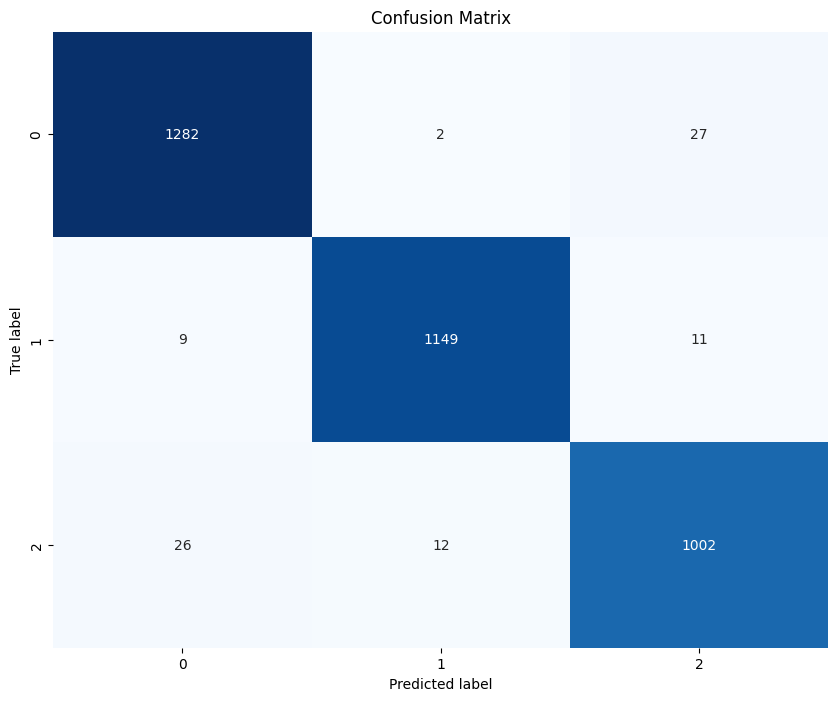

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
C_matrix = confusion_matrix(Y_val_LS, Y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(C_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


On the validation set, the model scored a high accuracy of 97.5 percent


Detailed analysis:

The confusion matrix's diagonal elements display high values, signifying numerous accurate classifications for every class.

Off-diagonal elements are relatively infrequent, implying a few incorrect classifications. 

But there are a few exceptions:
Class 0: Some incidents were incorrectly classed as 1 and 2.
Class 1: A tiny percentage of samples were incorrectly assigned to class 0.

Precision and Recall: For most classes, both measures are near 0.98, indicating good precision (accurately identifying the majority of optimistic predictions) and recall (catching most real positive cases).
Class 2: While precision is high, recall is slightly lower than in other classes, implying that the model may have missed a few genuine positives.

A balanced performance between recall and precision is shown by the F1 score, which is approximately 0.98 for most classes.
Class 2: like recall, has a somewhat lower F1 score, suggesting there may be room for progress in correctly classifying this one.


*Assume that you want to increase precision for your chosen class without retraining the model - what will you do? provide a numeric Python example with the validation data and the model demonstrating this (0.5 point). And same question, but for increasing recall (with Python example) (0.5 point).*

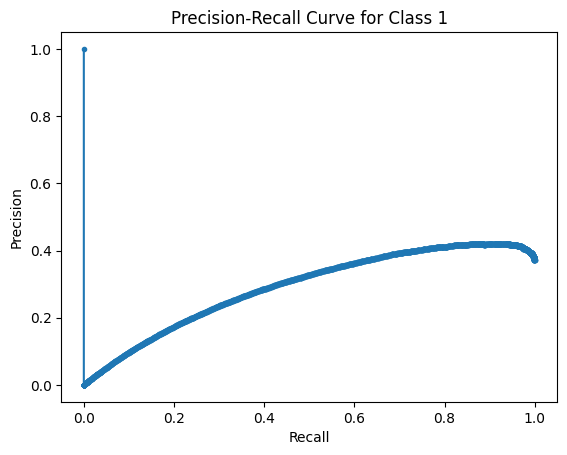

In [36]:
# Precision-recall curve for one class of your choice vs. all others
class_of_interest = 1
y_pred_proba = model.predict_proba(X_val_LS)[:, class_of_interest]
precision, recall, _ = precision_recall_curve(Y_val_LS == class_of_interest, y_pred_proba)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Class {}'.format(class_of_interest))
plt.show()

The model is operating effectively with a 97.5% accuracy rate on the validation set. This shows that the model correctly classified almost all of the data points.

The majority of the diagonal elements have high values.

**Optional Code**

*Assume that you want to increase precision for your chosen class without retraining the model - what will you do? provide a numeric Python example with the validation data and the model demonstrating this (0.5 point). And same question, but for increasing recall (with Python example) (0.5 point).*

In [37]:
# Increase precision 
threshold = 0.7
y_pred_threshold = (model.predict_proba(X_val_LS)[:, class_of_interest] > threshold).astype(int)
precision_threshold = precision_score(Y_val_LS == class_of_interest, y_pred_threshold)
print("Precision with threshold {}:".format(threshold), precision_threshold)

Precision with threshold 0.7: 0.0017331022530329288


The model may still predict the class of interest even for moderately confident predictions when the threshold is less than or equal to 0.7. This could result in a precision value that is not zero but true and false positives.

The model only predicts the class in extremely confident circumstances when you raise the threshold (in this example, 0.8). This can limit the number of false positives, but it may also miss some true positives below the threshold. If there are no further true positives over the threshold, this could result in a precision of 0.

In [38]:

# Increase recall 
threshold = 0.4
y_pred_threshold = (model.predict_proba(X_val_LS)[:, class_of_interest] > threshold).astype(int)
recall_threshold = recall_score(Y_val_LS == class_of_interest, y_pred_threshold)
print("Recall with threshold {}:".format(threshold), recall_threshold)

Recall with threshold 0.4: 0.002288329519450801


While decreasing the threshold increases the number of predicted positives, the model appears to have low confidence in predicting the class of interest in the validation set. This indicates that even at a relatively permissive threshold (0.4), the model only finds a very small percentage of true positives, which accounts for the incredibly low recall.

Run on the test set, and provide your conclusions (0.5 point).

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test_LS)

# Calculate evaluation metrics
accuracy = accuracy_score(Y_test_LS, y_pred)
confusion_matrix = confusion_matrix(Y_test_LS, y_pred)

# Calculating
num_classes = len(np.unique(Y_test_LS))
precision = precision_score(Y_test_LS, y_pred, average=None)
recall = recall_score(Y_test_LS, y_pred, average=None)
f1 = f1_score(Y_test_LS, y_pred, average=None)

# results
print("Test Set Results:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)

print("\nPrecision:")
for i in range(num_classes):
    print(f"Class {i}: {precision[i]:.4f}")

print("\nRecall:")
for i in range(num_classes):
    print(f"Class {i}: {recall[i]:.4f}")

print("\nF1 Score:")
for i in range(num_classes):
    print(f"Class {i}: {f1[i]:.4f}")



Test Set Results:
Accuracy: 0.9768129120254603
Confusion Matrix:
 [[1544    8   18]
 [   8 1431   17]
 [  33   18 1322]]

Precision:
Class 0: 0.9741
Class 1: 0.9822
Class 2: 0.9742

Recall:
Class 0: 0.9834
Class 1: 0.9828
Class 2: 0.9629

F1 Score:
Class 0: 0.9788
Class 1: 0.9825
Class 2: 0.9685


*Test Set Performance Analysis and Conclusions*

Accuracy: 0.9768, indicating that the model successfully identified over 98% of the samples in the test set. This implies that the model has strong generalizability to new data.

Confusion Matrix: The diagonal elements display high values for each class, indicating many accurate predictions. Off-diagonal elements often need to be higher, implying minimal misclassification.

Precision and Recall: The model appears to be exact (it accurately identifies the majority of optimistic predictions) and has a strong recall (it captures the majority of genuine positive cases) when the two indicators are near 0.98 for most classes.

The model's efficacy is confirmed by measuring recall and precision and is generally 0.98 for most F1 score w classes.